## Extract Data
From: Chapter 2 of    
Natural Language Processing Recipes: Unlocking Text Data with Machine Learning and Deep Learning using Python   
by Adarsha Shivananda, Akshay Kulkarni   
https://www.safaribooksonline.com/library/view/natural-language-processing/9781484242674/

#### Sample Data

In [44]:
text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity','There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
df.head(3)

,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity


#### Applying Basic String Functions to All Entries in a DataFrame   
Eg: Make them lowercase, for easy match later.

In [2]:
# book had this
# df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# simplified version:
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
df.head(3)

,tweet
0,this is introduction to nlp
1,"it is likely to be useful, to people"
2,machine learning is the new electrcity


But it is recommended to avoid apply as much as possible.   
More on this in Ted Petrou's recommendations:
https://github.com/tdpetrou/Learn-Pandas/blob/master/Minimal%20Pandas/Minimally%20Sufficient%20Pandas.ipynb

In [3]:
df['tweet'] = df['tweet'].str.lower()
df.head(3)

,tweet
0,this is introduction to nlp
1,"it is likely to be useful, to people"
2,machine learning is the new electrcity


#### Another Example: remove punctiation

In [4]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df.head(3)

,tweet
0,this is introduction to nlp
1,it is likely to be useful to people
2,machine learning is the new electrcity


#### Remove Stop Words
Use the NLTK library, or build your own stop words file.

In [6]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oozturk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#remove stop words
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_english))
df.head(3)

,tweet
0,introduction nlp
1,likely useful people
2,machine learning new electrcity


#### Spelling Autocorrect

In [15]:
# Option 1
#Install textblob library
!pip install textblob
#import libraries and use 'correct' function
from textblob import TextBlob
df['tweet'] = df['tweet'].apply(lambda x: str(TextBlob(x).correct()))
df.head(3)

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


,tweet
0,introduction nap
1,likely useful people
2,machine learning new electricity


In [10]:
#OPtion 2
#install autocorrect
!pip install autocorrect
from autocorrect import spell
print(spell(u'mussage'))
print(spell(u'sirvice'))

  Running setup.py install for autocorrect: started
    Running setup.py install for autocorrect: finished with status 'done'


You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


message
service


#### Tokenizing
There are many libraries to perform tokenization like NLTK, SpaCy, and TextBlob

In [11]:
# Using textblob
from textblob import TextBlob
TextBlob(df['tweet'][3]).words

WordList(['would', 'less', 'hype', 'around', 'ai', 'action', 'going', 'forward'])

In [13]:
# using NLTK
import nltk
nltk.word_tokenize(df['tweet'][3])

['would', 'less', 'hype', 'around', 'ai', 'action', 'going', 'forward']

In [12]:
# using split function from python
df['tweet'][3].split()

['would', 'less', 'hype', 'around', 'ai', 'action', 'going', 'forward']

#### Stemming
Stemming is a process of extracting a root word. Eg., “fish,” “fishes,” and “fishing” are stemmed to fish.   
But finds them by removing suffixes.
Compare to Lemmatizing in next section

In [16]:
#Import library
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'] = df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head(3)

,tweet
0,introduct nap
1,like use peopl
2,machin learn new electr


textblob is easy to use library:   
https://textblob.readthedocs.io/en/dev/quickstart.html

In [49]:
#Import library
from textblob import Word
Word('spaces').singularize()

'space'

In [50]:
sentence = TextBlob('Use 4 spaces per indentation level.')
sentence.words

WordList(['Use', '4', 'spaces', 'per', 'indentation', 'level'])

In [51]:
sentence.words[2].singularize()

'space'

In [52]:
sentence.words[-1].pluralize()

'levels'

In [54]:
# functions are vectorized operations 
sentence.words.pluralize()

WordList(['Uses', '4s', 'spacess', 'pers', 'indentations', 'levels'])

#### Lemmatizing
Process of extracting a root word by considering the vocabulary, not just removing suffix.   
For example, “good,” “better,” or “best” is lemmatized into good.   
Returned word must be a valid word in the dictionary. 

In [59]:
Word("octopi").lemmatize()

'octopus'

In [70]:
Word("southern").lemmatize()

'southern'

In [71]:
#Import library
from textblob import Word
# Reset to original data, add initial row
text=['octopi went southern sea', 'This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity','There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
df = pd.DataFrame({'tweet':text})

In [63]:
# Code to lemmatize dataframe contents
df['tweet'] = df['tweet'].apply(lambda x: TextBlob(x).words.lemmatize())
df.head(3)

,tweet
0,"[octopus, went, southern, sea]"
1,"[This, is, introduction, to, NLP]"
2,"[It, is, likely, to, be, useful, to, people]"


In [72]:
# Code to lemmatize dataframe contents
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head(3)

,tweet
0,octopus went southern sea
1,This is introduction to NLP
2,"It is likely to be useful, to people"


#### Exploring Text
Word Frequency Analysis

In [21]:
#Importing sample data
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

#Import Library for computing frequency:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Oozturk\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [22]:
type(wt_sentences)

nltk.corpus.reader.util.StreamBackedCorpusView

Googling StreamBackedCorpusViewfound:   
http://www.nltk.org/_modules/nltk/corpus/reader/util.html    
from comments under class StreamBackedCorpusView and since it has __getitem__, it must have a [] accessor  
Also links to docs, http://www.nltk.org/api/nltk.corpus.reader.html#nltk.corpus.reader.categorized_sents.StreamBackedCorpusView   
From docs, we understand that it is a memory efficient way of representing corpus:   
"A ‘view’ of a corpus file, which acts like a sequence of tokens: it can be accessed by index, iterated over, etc. However, the tokens are only constructed as-needed – the entire corpus is never stored in memory at once."   
"Internally, CorpusView maintains a partial mapping from token index to file position, with one entry per block. When a token with a given index i is requested, the CorpusView constructs it" 
(for other special Python methods like __getitem__ you can see: https://docs.python.org/2/reference/datamodel.html)

In [26]:
wt_sentences[3]

['Customising', 'toolbar', 'breaks', 'the', 'throbber', '!']

In [29]:
wt_words[0]

'Cookie'

In [32]:
# frequencies of all the words:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


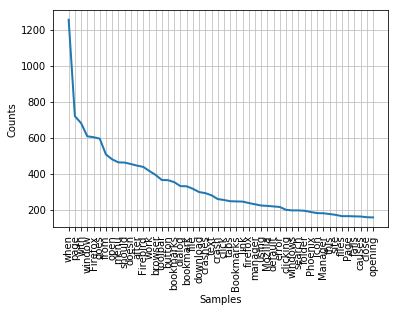

In [36]:
!pip install matplotlib
import matplotlib
%matplotlib inline
# Filter words with frequency is greater than 3.
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)